# 영역 기반 처리
## 회선(convolution) 기법을 사용
- 영상 흐리게 하기
- 선명화
- 경계선 검출
- 잡음 제거
- 컬러 영상 처리

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('lenna.jpg',0)
dst = np.copy(src)
H,W = src.shape[:2]

## 회선 마스크 만들기
- 마스크의 크기는 홀수
- 계수의 합이 대부분 1
- 경계선 검출등 일부 회선 마스크에는 계수의 합이 0

In [3]:
mask_size = 3
mask = np.ones((mask_size,mask_size))/(mask_size**2) # 영상 좌우로 흔들린 사진 (1,3), 영상 상하로 흔들린 사진 (3,1) # 특수 회선 마스크가 아니라 계수의 합이 0이다
boundary = int ((mask_size -1) /2.0) 
# boundary = cv2.filter2D(src, -1, kernel = mask)

## dst는 흐리게한 것

In [4]:
for h in range(boundary, H -boundary):
    for w in range(boundary, W - boundary):
        src_mask = src[h-boundary:h+boundary+1, w-boundary:w+boundary+1]
        dst[h,w] = np.sum(mask * src_mask)

dst = dst.astype(np.uint8)

## dst -> clear

In [5]:
dst_clear = np.copy(dst)

In [6]:
clear_mask = np.ones((mask_size,mask_size)) * -1
clear_mask[1,1] = 9
clear_mask

array([[-1., -1., -1.],
       [-1.,  9., -1.],
       [-1., -1., -1.]])

In [7]:
for h in range(boundary, H -boundary):
    for w in range(boundary, W - boundary):
        dst_mask = dst[h-boundary:h+boundary+1, w-boundary:w+boundary+1]
        dst_clear[h,w] = np.sum(clear_mask * dst_mask)

dst_clear = dst.astype(np.uint8)

Text(0.5, 1.0, 'clear')

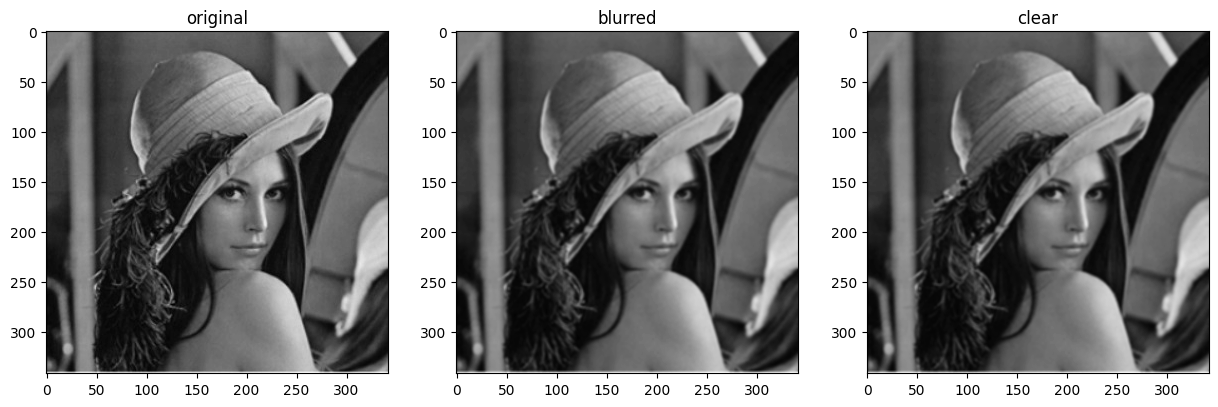

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].imshow(src, cmap = 'gray') 
axes[0].set_title('original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('blurred')
axes[2].imshow(dst_clear, cmap = 'gray')
axes[2].set_title('clear')